# <center>***KNN or Logistic Regression?***</center>
## <center>*Which is a better model for MNIST classification?*</center>




## **Importing Essential Libraries and Modules**

***General Purpose***: This cell imports a variety of libraries and modules required for data manipulation, machine learning, and visualization tasks. These imports provide the necessary tools to handle datasets, build and evaluate machine learning models, and create visual representations of data.


1. **import `time`**: Imports the time module, which provides various time-related functions. It is useful for measuring execution time and adding delays.

2. **import `numpy as np`**: Imports the NumPy library, which is essential for numerical computations. It offers support for arrays, matrices, and a range of mathematical functions to efficiently handle and manipulate large datasets.

3. **import `sys`**: Imports the sys module, which interacts with the Python interpreter. It provides access to system-specific parameters and functions, such as command-line arguments and system-level operations.

4. **import `pandas as pd`**: Imports the pandas library, a powerful tool for data manipulation and analysis. It introduces DataFrames, which are ideal for handling structured data and performing complex data operations.

5. **import `sklearn`**: Imports the scikit-learn library, a comprehensive toolkit for machine learning. It includes functions for building and evaluating machine learning models across various algorithms and tasks.

6. **import `matplotlib.pyplot as plt`**: Imports the pyplot module from Matplotlib, used for creating a wide range of static, animated, and interactive plots and graphs. It helps visualize data and results effectively.

7. **from `tqdm` import `tqdm`**: Imports the tqdm library, which provides progress bars for loops and operations. This visual feedback is useful for monitoring long-running tasks.

8. **from `sklearn.model_selection` import `train_test_split`**: Imports the train_test_split function from scikit-learn, used to split a dataset into training and testing sets. This separation is crucial for evaluating model performance.

9. **from `sklearn.neighbors` import `KNeighborsClassifier`**: Imports the KNeighborsClassifier class, an algorithm for classification tasks. It assigns a class to a data point based on the majority class among its nearest neighbors.

10. **from `sklearn.linear_model` import `LogisticRegression`**: Imports the LogisticRegression class, which is used for binary and multiclass classification problems. It estimates the probability of a class label using a logistic function.

11. **from `sklearn.metrics` import `accuracy_score`, `precision_score`, `recall_score`, `f1_score`**: Imports evaluation metrics from scikit-learn to assess the performance of classification models. These metrics help quantify the model’s effectiveness in terms of accuracy, precision, recall, and the F1 score.

12. **import `sklearn.datasets`**: Imports the dataset module from scikit-learn, which provides access to various sample datasets for testing and training machine learning models.



In [8]:
import time
import numpy as np
import sys
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import sklearn.datasets

### **Loading and Visualizing the MNIST Dataset**

***General Purpose***: This cell retrieves the `MNIST` dataset, which consists of 70,000 images of handwritten digits, and then visualizes the first 10 images along with their labels. The `MNIST` dataset is commonly used for training and testing machine learning models, especially in tasks related to image recognition and classification.

##### **Explanation**:

- The `MNIST` dataset is loaded using scikit-learn's fetch_openml function, with X containing the pixel data of the images and y containing the corresponding digit labels. The shapes of `X` and `y` are checked to confirm the dimensions of the dataset.
- A figure is created using Matplotlib to visualize the first 10 images in the dataset. Each image is reshaped from a 1D array of 784 pixels into a 28x28 pixel grid, which is then displayed in grayscale.
- The images are shown in a 2x5 grid layout, with each image labeled according to its corresponding digit. The axis is turned off for a cleaner presentation.


This visualization provides an immediate understanding of the dataset's content and the format of the data you'll be working with in subsequent analysis or modeling steps.

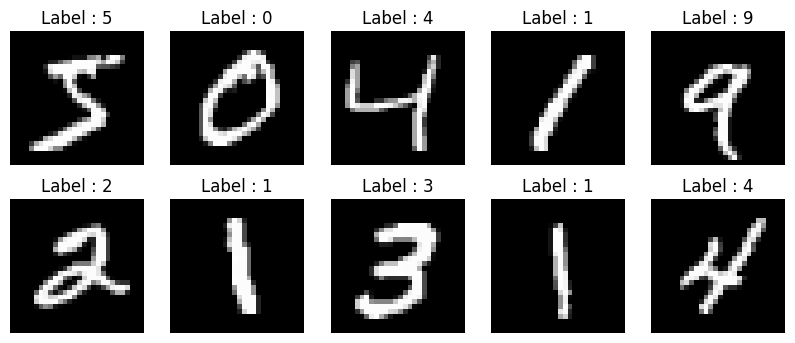

In [3]:
X, y = sklearn.datasets.fetch_openml('mnist_784', return_X_y=True, as_frame=False)
X.shape, y.shape

plt.figure(figsize=(10,4))
for index, (image, label) in enumerate(zip(X[0:10], y[0:10])):
    plt.subplot(2, 5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Label : ' + label)
    plt.axis('off')
plt.show()

### **Preparing Parameters for Model Evaluation**
***General Purpose***: This cell initializes lists and data structures that will be used later for evaluating the performance of a k-Nearest Neighbors (k-NN) classifier across different values of k (the number of neighbors) and various sample sizes of the dataset.

##### **Explanation**:

- `K_list` is a list of integers representing different values of k (from 1 to 10) that will be tested in the k-NN algorithm. Varying k helps in understanding how the choice of neighbors affects the model's performance.
- `sample_list` contains different sample sizes (ranging from 200 to 6000) that will be used to evaluate how the model performs with varying amounts of training data. This helps in assessing the impact of training size on accuracy and generalization.
- `data` is initialized as an empty list, intended to store the results of these evaluations, such as accuracy scores or other metrics, for later analysis and comparison.


This setup is crucial for conducting a thorough analysis of how the k-NN classifier's performance varies with different configurations.

In [4]:
K_list = [1,2,3,4,5,6,7,8,9,10]
sample_list = [200,500,1000,2000,6000]
data = []

### **Evaluating k-Nearest Neighbors Classifier Across Different Sample Sizes and k Values**
***General Purpose***: This cell evaluates the performance of a k-Nearest Neighbors (k-NN) classifier across various configurations, specifically by testing different values of k (number of neighbors) and different sample sizes from the MNIST dataset. The results are tracked and stored for later analysis.

##### **Explanation**:

- **Progress Bar Initialization**:

    - The tqdm progress bar is initialized with a green color, a smoothing factor of 1, and a total of 50 steps, displayed in the console (sys.stdout). This progress bar visually tracks the progress of the evaluation process.
- **Main Loop**:

    - The outer loop iterates over different sample sizes (sample_list). For each sample size, it calculates the training size as a proportion of the entire dataset and updates the progress bar with a description indicating the number of samples being evaluated.

    - Within the outer loop, a nested loop iterates over the list of k values (K_list). For each combination of k and sample size:

        - <u>*Data Splitting*</u>: The dataset is split into training and testing sets using train_test_split, with the training set size based on the current n_sample. Stratification ensures that the distribution of classes remains consistent across splits.

        - <u>*Model Training*</u>: A KNeighborsClassifier model is initialized with the current k value and trained on the training data. The training time is recorded.

        - <u>*Model Prediction*</u>: The trained model is used to predict labels on the test set, and the prediction time is recorded.

        - <u>*Performance Metrics*</u>: Key performance metrics are computed: accuracy, precision, recall, and F1-score, using scikit-learn's 
        accuracy_score, precision_score, recall_score, and f1_score functions. These metrics give a comprehensive view of the model’s effectiveness.

        - <u>*Output*</u>: The results are printed to the console, including the k value, accuracy, precision, recall, F1-score, and the time taken for training and prediction.
        
        - <u>*Data Collection*</u>: The results for each model configuration are stored in a dictionary and appended to the data list for later analysis.
- **Progress Bar Update**:

    - After evaluating all k values for a given sample size, the progress bar is updated and displayed.


This cell systematically evaluates how the k-NN classifier's performance varies with different numbers of neighbors and training sample sizes, providing detailed insights into the model's behavior under different conditions. The collected data will be valuable for determining the optimal configuration for the classifier.

In [5]:
progress = tqdm(colour='green', smoothing=1, total=50, file=sys.stdout)

for n_sample in sample_list:

    train_size = (n_sample*10)/len(X)
    
    progress.set_description(f'> Evaluating for {n_sample} Samples')
    
    print()
    for k in (K_list):
         
        x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=train_size, stratify=y, random_state=10)

        model = KNeighborsClassifier(n_neighbors=k)

        t0_f = time.time()
        model.fit(x_train, y_train)
        train_time = time.time()-t0_f

        t0_t = time.time()
        predictions = model.predict(x_test)
        predict_time = time.time()-t0_t

        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average="weighted")
        recall = recall_score(y_test, predictions, average="weighted")
        f1 = f1_score(y_test, predictions, average="weighted")

        print(f'\t{k}. Model : {model.__class__.__name__} ==> Neighbors : {k}')

        print(f'\t\t- Accuracy : {round(accuracy*100, 2)}')
        print(f'\t\t- Precision : {round(precision*100, 2)}')
        print(f'\t\t- Recall : {round(recall*100, 2)}')
        print(f'\t\t- F1 : {round(f1*100, 2)}')
        print(f'\t\t(Train Time : {round(train_time, 5)}s / Predict Time : {round(predict_time, 4)}s)')
        print()

        
        result = {"Model": model.__class__.__name__,
                  "Neighbors": k,
                  "n_samples": n_sample,
                  "Train Time": train_time,
                  "Prediction Time": predict_time,
                  "Accuracy": accuracy,
                  "Precision": precision,
                  "Recall": recall,
                  "F1": f1}

        data.append(result)



    progress.update(10)
    progress.display()
    

> Evaluating for 200 Samples:   0%|          | 0/50 [00:00<?, ?it/s]
	1. Model : KNeighborsClassifier ==> Neighbors : 1
		- Accuracy : 91.04
		- Precision : 91.14
		- Recall : 91.04
		- F1 : 91.01
		(Train Time : 0.008s / Predict Time : 5.5676s)

	2. Model : KNeighborsClassifier ==> Neighbors : 2
		- Accuracy : 89.25
		- Precision : 89.73
		- Recall : 89.25
		- F1 : 89.12
		(Train Time : 0.00401s / Predict Time : 6.4157s)

	3. Model : KNeighborsClassifier ==> Neighbors : 3
		- Accuracy : 90.82
		- Precision : 91.04
		- Recall : 90.82
		- F1 : 90.77
		(Train Time : 0.0s / Predict Time : 6.3688s)

	4. Model : KNeighborsClassifier ==> Neighbors : 4
		- Accuracy : 90.66
		- Precision : 90.94
		- Recall : 90.66
		- F1 : 90.6
		(Train Time : 0.00832s / Predict Time : 7.4795s)

	5. Model : KNeighborsClassifier ==> Neighbors : 5
		- Accuracy : 90.86
		- Precision : 91.17
		- Recall : 90.86
		- F1 : 90.82
		(Train Time : 0.0083s / Predict Time : 7.6594s)

	6. Model : KNeighborsClassifier ==> Ne

<h3><b>Visualizing the Performance of the k-Nearest Neighbors Classifier</b></h3>

<b>General Purpose:</b> This cell creates visualizations to analyze the performance of the k-Nearest Neighbors (k-NN) classifier based on different metrics across varying numbers of neighbors and sample sizes. The resulting plots provide insights into how the classifier's performance is affected by these parameters.

<b>Explanation:</b>
<ul>
    <li><b>DataFrame Creation:</b> The <code>data</code> collected from the previous evaluations is converted into a pandas DataFrame (<code>df</code>). This structure makes it easier to manipulate and visualize the data.</li>
    <>
    <li><b>Figure and Subplots Setup:</b> A figure with a 2x3 grid of subplots is created using Matplotlib's <code>subplots</code> function, with an overall figure size of 18x10 inches. The figure's title is set to "KNeighborsClassifier Performance Metrics".</li>
    <>
    <li><b>Metrics and Titles:</b> The <code>metrics</code> list includes the performance metrics (<code>Accuracy</code>, <code>Precision</code>, <code>Recall</code>, <code>F1</code>, <code>Train Time</code>, and <code>Prediction Time</code>) to be plotted, while <code>titles</code> contains corresponding titles for each subplot.</li>
    <>
    <li><b>Plotting Loop:</b> 
        <ul>
            <li>A loop iterates through the <code>metrics</code> list to create individual plots:</li>
            <li>The subplot's row and column position is determined by dividing (<code>//</code>) and taking the modulus (<code>%</code>) of the loop index.</li>
            <li>For each metric, the DataFrame is filtered by sample size (<code>n_samples</code>), and the corresponding data is plotted against the number of neighbors (<code>Neighbors</code>). Each line represents a different sample size, helping to compare the effects of sample size on the metric.</li>
            <li>The subplot is customized with titles, labels, and legends for clarity, and a grid is added for better readability.</li>
        </ul>
    </li>
    <>
    <li><b>Layout and Display:</b> <code>plt.tight_layout</code> ensures that the subplots are neatly arranged without overlapping, while <code>rect</code> adjusts the layout to accommodate the main title. Finally, <code>plt.show()</code> renders the plots.</li>
</ul>

<p>This visualization effectively summarizes how the k-NN classifier's performance varies with different numbers of neighbors and sample sizes, providing a comprehensive view of the trade-offs between accuracy, precision, recall, F1-score, and computational efficiency (training and prediction times).</p>


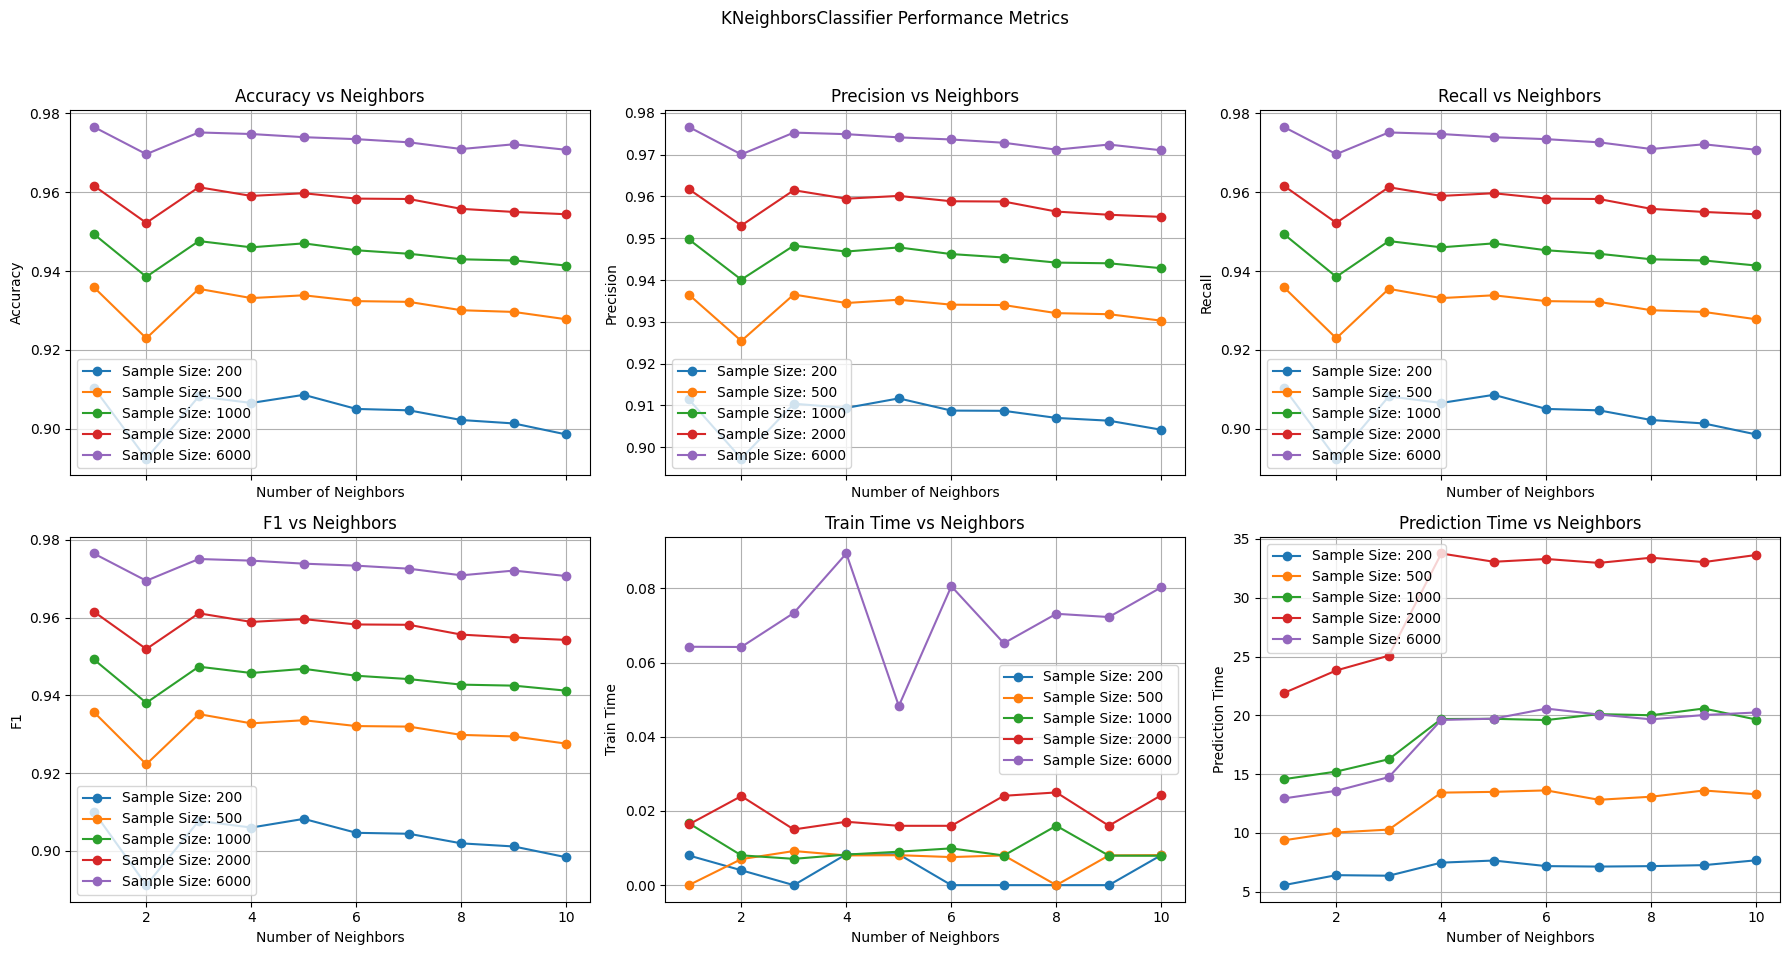

In [34]:
df = pd.DataFrame(data)


fig, axs = plt.subplots(2, 3, figsize=(18, 10), sharex='col')
fig.suptitle('KNeighborsClassifier Performance Metrics')


metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'Train Time', 'Prediction Time']
titles = ['Accuracy vs Neighbors', 'Precision vs Neighbors', 'Recall vs Neighbors', 'F1 vs Neighbors', 'Train Time vs Neighbors', 'Prediction Time vs Neighbors']

for i, metric in enumerate(metrics):
    row = i // 3
    col = i % 3
    for sample_size in df['n_samples'].unique():
        subset = df[df['n_samples'] == sample_size]
        axs[row, col].plot(subset['Neighbors'], subset[metric], marker='o', linestyle='-', label=f'Sample Size: {sample_size}')
    
    axs[row, col].set_title(titles[i])
    axs[row, col].set_xlabel('Number of Neighbors')
    axs[row, col].set_ylabel(metric)
    axs[row, col].legend()
    axs[row, col].grid(True)



plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### **Setting Up the Best Models for Final Evaluation**

***General Purpose***: This cell prepares the best-performing models identified from previous evaluations and sets up a DataFrame to display the results from the k-NN classifier analysis. It also initializes the two best models, a k-Nearest Neighbors (k-NN) model and a Logistic Regression model, for further evaluation.

##### **Explanation**:

- **DataFrame Creation**:

    - The `data` collected from previous evaluations is converted into a new pandas DataFrame (`dataframe`), which is then displayed to review the performance metrics of different configurations.
- **Best Model Parameters**:

    - The variables `best_sample` and `best_k` are set to 6000 and 1, respectively, representing the optimal sample size and k value determined from the k-NN analysis. These values will be used to train the final k-NN model.
- **Model Initialization**:

    - `best_knn`: A `KNeighborsClassifier` is initialized with `best_k = 1`, representing the best-performing k-NN model identified in the analysis.
    - `best_lreg`: A `LogisticRegression` model is initialized with specific parameters. This model, already identified as optimal from previous projects, uses an L1 penalty (Lasso regularization), the `saga` solver, and other custom parameters to ensure it performs well under the given conditions.
- **Models List**:

    - Both `best_knn` and `best_lreg` models are stored in a list called `models`, which will be used for further evaluation or comparison.
- **Final Data Storage**:

    - An empty list `final_data` is initialized to store results from the final evaluation of these models, which will be conducted later in the notebook.

    
This setup is crucial for performing a final comparison between the best k-NN and Logistic Regression models, allowing for a more comprehensive evaluation of their performance on the MNIST dataset.

In [18]:
dataframe = pd.DataFrame(data)

display(dataframe)
best_sample = 6000
best_k = 1

best_knn = KNeighborsClassifier(best_k)
best_lreg = LogisticRegression(fit_intercept = True,
                               penalty='l1',
                               solver='saga',
                               max_iter=1000,
                               C=50,
                               verbose=2,
                               n_jobs=5,
                               tol=0.01)

models = [best_knn, best_lreg]
final_data = []

,Model,Neighbors,n_samples,Train Time,Prediction Time,Accuracy,Precision,Recall,F1
0,KNeighborsClassifier,1,200,0.008000,5.567624,0.910441,0.911436,0.910441,0.910059
1,KNeighborsClassifier,2,200,0.004010,6.415688,0.892485,0.897253,0.892485,0.891170
2,KNeighborsClassifier,3,200,0.000000,6.368762,0.908235,0.910386,0.908235,0.907691
3,KNeighborsClassifier,4,200,0.008320,7.479536,0.906574,0.909384,0.906574,0.905984
4,KNeighborsClassifier,5,200,0.008302,7.659414,0.908632,0.911659,0.908632,0.908214
5,KNeighborsClassifier,6,200,0.000000,7.184396,0.905059,0.908739,0.905059,0.904628
6,KNeighborsClassifier,7,200,0.000000,7.145737,0.904706,0.908680,0.904706,0.904385
7,KNeighborsClassifier,8,200,0.000000,7.182951,0.902250,0.906985,0.902250,0.901917
8,KNeighborsClassifier,9,200,0.000000,7.267220,0.901382,0.906323,0.901382,0.901116
9,KNeighborsClassifier,10,200,0.008104,7.681404,0.898588,0.904148,0.898588,0.898336


### **Evaluating Final Models Across Different Sample Sizes**

***General Purpose***: This cell evaluates the performance of the final selected models (k-Nearest Neighbors and Logistic Regression) across various sample sizes. The performance metrics are recorded and stored for further analysis.

##### **Explanation**:

- **Progress Bar Initialization**: A progress bar is initialized using `tqdm`, set to iterate over `sample_list` with a total of 50 steps. This bar will visually track the progress of evaluating different sample sizes, displayed in green.

- **Main Evaluation Loop**:

    - The outer loop iterates over the different sample sizes in `sample_list`. For each sample size, the training size is calculated as a proportion of the entire dataset, and the progress bar is updated with the current sample size being evaluated.

    - **Model Evaluation**: For each model in the `models` list:

        - The dataset is split into training and testing sets using `train_test_split`, with the current sample size determining the training set size. Stratification ensures that class distribution is preserved.

        - The model is trained on the training data, and the training time is recorded. The trained model is then used to make predictions on the test data, with prediction time also recorded.

        - Performance metrics (accuracy, precision, recall, F1-score) are calculated using scikit-learn functions. These metrics provide a comprehensive view of the model’s performance.

        - Results are printed, including the model type, accuracy, precision, recall, F1-score, and times for training and prediction.

        - The results are stored in a dictionary and appended to the `final_data` list for future analysis.

    - The progress bar is updated and displayed after evaluating each sample size.


This cell allows for a detailed comparison of how the final models perform across different sample sizes, capturing essential performance metrics for both the k-Nearest Neighbors and Logistic Regression models.

In [24]:
progress = tqdm(sample_list, colour='green', smoothing=1, total=50, file=sys.stdout)

for n_sample in sample_list:

    train_size = (n_sample*10)/len(X)
    
    progress.set_description(f'> Evaluating for {n_sample} Samples')
    
    print()
    for model in models:
         
        x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=train_size, stratify=y, random_state=10)

        t0_f = time.time()
        model.fit(x_train, y_train)
        train_time = time.time()-t0_f

        t0_t = time.time()
        predictions = model.predict(x_test)
        predict_time = time.time()-t0_t

        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average="weighted")
        recall = recall_score(y_test, predictions, average="weighted")
        f1 = f1_score(y_test, predictions, average="weighted")

        print(f'\t>> Model : {model.__class__.__name__}')

        print(f'\t\t- Accuracy : {round(accuracy*100, 2)}')
        print(f'\t\t- Precision : {round(precision*100, 2)}')
        print(f'\t\t- Recall : {round(recall*100, 2)}')
        print(f'\t\t- F1 : {round(f1*100, 2)}')
        print(f'\t\t(Train Time : {round(train_time, 5)}s / Predict Time : {round(predict_time, 4)}s)')
        print()

        
        result = {"Model": model.__class__.__name__,
                  "n_samples": n_sample,
                  "Train Time": train_time,
                  "Prediction Time": predict_time,
                  "Accuracy": accuracy,
                  "Precision": precision,
                  "Recall": recall,
                  "F1": f1}

        final_data.append(result)



    progress.update(10)
    progress.display()

> Evaluating for 200 Samples:   0%|          | 0/50 [00:00<?, ?it/s]
	>> Model : KNeighborsClassifier
		- Accuracy : 91.04
		- Precision : 91.14
		- Recall : 91.04
		- F1 : 91.01
		(Train Time : 0.0s / Predict Time : 4.7779s)



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 40 epochs took 8 seconds
	>> Model : LogisticRegression
		- Accuracy : 88.04
		- Precision : 88.0
		- Recall : 88.04
		- F1 : 87.99
		(Train Time : 7.79408s / Predict Time : 0.1887s)

> Evaluating for 500 Samples:  20%|██        | 10/50 [00:18<01:12,  1.81s/it]
	>> Model : KNeighborsClassifier
		- Accuracy : 93.59
		- Precision : 93.65
		- Recall : 93.59
		- F1 : 93.57
		(Train Time : 0.00801s / Predict Time : 8.2041s)



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 48 epochs took 23 seconds
	>> Model : LogisticRegression
		- Accuracy : 89.34
		- Precision : 89.32
		- Recall : 89.34
		- F1 : 89.32
		(Train Time : 22.94022s / Predict Time : 0.1938s)

> Evaluating for 1000 Samples:  40%|████      | 20/50 [00:55<01:50,  3.69s/it]
	>> Model : KNeighborsClassifier
		- Accuracy : 94.94
		- Precision : 94.97
		- Recall : 94.94
		- F1 : 94.92
		(Train Time : 0.01632s / Predict Time : 14.1842s)



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 64 epochs took 69 seconds
	>> Model : LogisticRegression
		- Accuracy : 90.25
		- Precision : 90.22
		- Recall : 90.25
		- F1 : 90.23
		(Train Time : 68.84386s / Predict Time : 0.1824s)

> Evaluating for 2000 Samples:  60%|██████    | 30/50 [02:23<02:57,  8.88s/it]
	>> Model : KNeighborsClassifier
		- Accuracy : 96.16
		- Precision : 96.18
		- Recall : 96.16
		- F1 : 96.15
		(Train Time : 0.02152s / Predict Time : 21.7716s)



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 60 epochs took 124 seconds
	>> Model : LogisticRegression
		- Accuracy : 91.1
		- Precision : 91.07
		- Recall : 91.1
		- F1 : 91.08
		(Train Time : 123.55221s / Predict Time : 0.1683s)

> Evaluating for 6000 Samples:  80%|████████  | 40/50 [04:54<02:30, 15.04s/it]
	>> Model : KNeighborsClassifier
		- Accuracy : 97.65
		- Precision : 97.66
		- Recall : 97.65
		- F1 : 97.65
		(Train Time : 0.05598s / Predict Time : 12.8438s)



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 49 epochs took 312 seconds
	>> Model : LogisticRegression
		- Accuracy : 92.09
		- Precision : 92.09
		- Recall : 92.09
		- F1 : 92.08
		(Train Time : 311.68735s / Predict Time : 0.0317s)

> Evaluating for 6000 Samples: 100%|██████████| 50/50 [10:22<00:00, 32.79s/it]

### **Comparison of Model Performance Metrics**

***General Purpose***: This cell creates visual comparisons of the performance metrics for the different models evaluated. It plots various metrics against sample sizes to analyze how each model performs in terms of training time, prediction time, and classification performance.

##### **Explanation**:

- **Model and Sample Size Extraction**:

    - `models` is a list of unique model names extracted from the `final_data` list. This helps in identifying all the models that were evaluated.

    - `sample_sizes` is a sorted list of unique sample sizes from the `final_data`. This provides a range of sample sizes used for evaluation.

- **Figure and Subplots Setup**:

    - A figure with a 3x2 grid of subplots is created using Matplotlib’s `subplots` function, with an overall figure size of 14x12 inches. The figure is given a title: "Comparison of Model Performance Metrics."

- **Metrics and Titles**:

    - `metrics` list includes the performance metrics to be plotted: `Train Time`, `Prediction Time`, `Accuracy`, `Precision`, `Recall`, and `F1`.

    - `ax_titles` list provides titles for the subplots, specifying the units or type of each metric.

- **Plotting Loop**:

    - The loop iterates over each metric:

        - For each metric, the corresponding subplot is accessed.

        - Data is filtered and plotted for each model. The x-axis represents the number of samples, while the y-axis represents the metric value.

        - Different models are plotted on the same axis for comparison, with markers indicating data points and a legend differentiating between models.

        - The subplot is labeled with the metric title, and axes labels are set according to the metric.

- **Layout and Display**:

    - `plt.tight_layout` adjusts subplot parameters to ensure there is no overlap between plots and the overall layout is clean.

    - `plt.show()` renders the plots.


This visualization provides a clear comparison of how different models perform across various sample sizes, focusing on metrics such as training time, prediction time, accuracy, precision, recall, and F1 score.

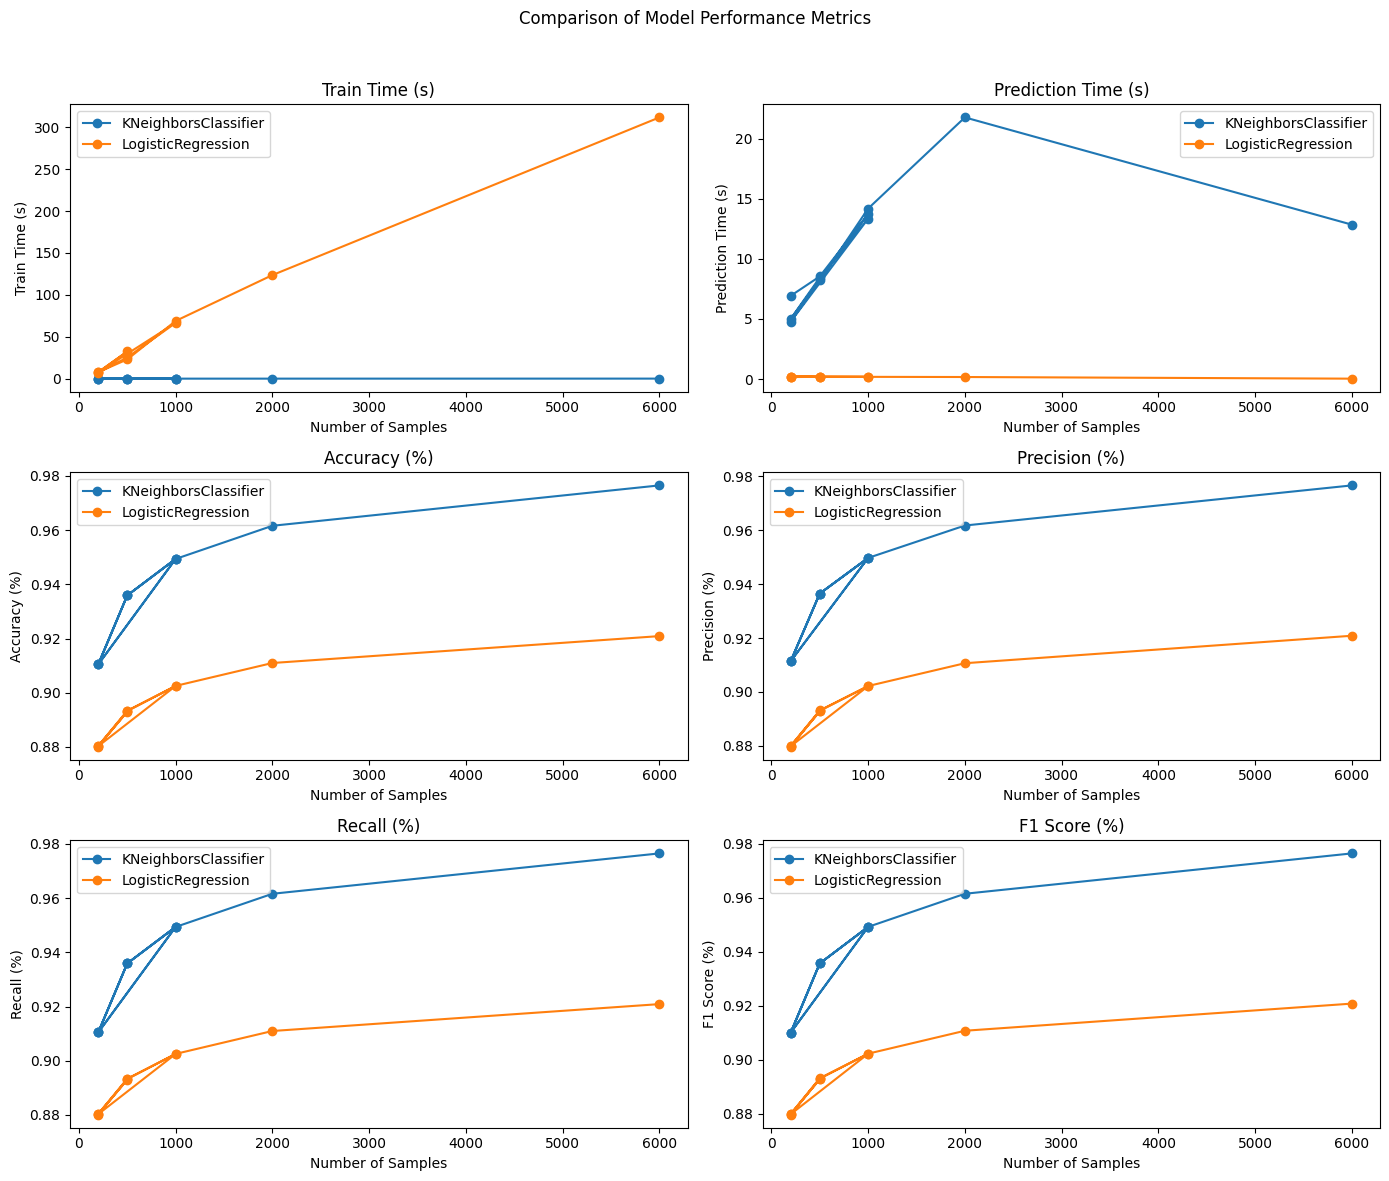

In [28]:
models = list(set(d['Model'] for d in final_data))
sample_sizes = sorted(set(d['n_samples'] for d in final_data))


fig, axs = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Comparison of Model Performance Metrics')


metrics = ['Train Time', 'Prediction Time', 'Accuracy', 'Precision', 'Recall', 'F1']
ax_titles = ['Train Time (s)', 'Prediction Time (s)', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1 Score (%)']


for i, metric in enumerate(metrics):
    ax = axs[i//2, i%2]
    for model in models:
        x = [d['n_samples'] for d in final_data if d['Model'] == model]
        y = [d[metric] for d in final_data if d['Model'] == model]
        ax.plot(x, y, marker='o', label=model)

    ax.set_title(ax_titles[i])
    ax.set_xlabel('Number of Samples')
    ax.set_ylabel(ax_titles[i])
    ax.legend()


plt.tight_layout(rect=[0, 0, 1, 0.96])


plt.show()

## **Conclusion**
In this analysis, we evaluated and compared the performance of k-Nearest Neighbors (k-NN) and Logistic Regression models on the MNIST dataset across various sample sizes. The following key insights were drawn from the evaluation:

##### 1. **Model Performance Metrics**:

- **Accuracy, Precision, Recall, and F1 Score**: The plots illustrate how the performance of each model varies with different sample sizes. Typically, as the sample size increases, we expect improvements in these metrics due to more data allowing the models to learn better representations of the classes. Observing the trends in accuracy and other metrics helps identify the strengths and weaknesses of each model in handling different amounts of data.

- **Training and Prediction Times**: The visualizations of training and prediction times provide insight into the computational efficiency of the models. The k-NN classifier generally shows increased training time with larger sample sizes due to its lazy learning nature, whereas Logistic Regression, being an eager learner, might exhibit more stable training times but can still be affected by sample size.

##### 2. **Model Comparison**:

- The comparison highlights the trade-offs between different models. For instance, k-NN may offer better performance on some metrics but at the cost of higher computational demands, especially for larger datasets. Logistic Regression, on the other hand, may provide more consistent performance with faster training times.

##### 3. **Optimal Models**:

- The analysis helps in determining which model performs best under different conditions. The k-NN model with k=1 and the Logistic Regression model with specific hyperparameters were found to be the best configurations based on prior evaluations. This final analysis confirmed their performance across various sample sizes and metrics.



Overall, this evaluation aids in understanding the effectiveness of different models and their suitability for specific applications or datasets. By analyzing how models scale with data and their respective trade-offs in terms of accuracy and computational efficiency, we can make more informed decisions about which model to deploy for real-world applications.